# Data imputation

This dataset has been downloaded from  Kaggle https://www.kaggle.com/karangadiya/fifa19. License: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In this notebook we will do data processing for the dataset, imputing values that are missing based on present data.

## Step 1: Import libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

## Step 2: Load data

First, we define where our data is and where we will store the imputated file

In [2]:
DATA = "../Data"
INPUT_FILE_NAME = f"{DATA}/FootballPlayerRawDataset.csv"

ATT_FILE_NAME = f"{DATA}/FootballPlayerPreparedCleanAttributes.csv"
IMPUTED_ATT_FILE_NAME = f"{DATA}/ImputedFootballPlayerPreparedCleanAttributes.csv"

ONE_HOT_ENCODED_CLASSES_FILE_NAME = f"{DATA}/FootballPlayerOneHotEncodedClasses.csv"
IMPUTED_ONE_HOT_ENCODED_CLASSES_FILE_NAME = f"{DATA}/ImputedFootballPlayerOneHotEncodedClasses.csv"

Now we load the data and show its info

In [3]:
dataset = pd.read_csv(INPUT_FILE_NAME, sep=",")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

## Step 3: Data cleaning

### Step 3.1: Remove unnecessary columns

We remove all goalkeepers as we will also remove the columns that represent their statistics

In [5]:
dataset.drop(dataset[dataset.Position=='GK'].index, inplace=True)

Then we remove unnecesary columns that we think won't affect the overall score of a player:
- Id
- Name
- Photo
- Nationality and Flag
- Team
- Club and Club Logo
- Preferred Foot
- Work Rate
- Body Type
- Real Face
- Position
- Jersey Number
- Joined
- Loaned From
- Contract Valid Until
- Height
- Weight
- From LS to RB
- From GKDiving to GKReflexes


In [6]:
dataset.drop(dataset.loc[:, 'Unnamed: 0':'Name'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Photo':'Flag'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Club':'Club Logo'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Preferred Foot':'Preferred Foot'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Work Rate':'RB'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'GKDiving':'GKReflexes'].columns, inplace=True, axis = 1)



In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16182 entries, 0 to 18206
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16182 non-null  int64  
 1   Overall                   16182 non-null  int64  
 2   Potential                 16182 non-null  int64  
 3   Value                     16182 non-null  object 
 4   Wage                      16182 non-null  object 
 5   Special                   16182 non-null  int64  
 6   International Reputation  16134 non-null  float64
 7   Weak Foot                 16134 non-null  float64
 8   Skill Moves               16134 non-null  float64
 9   Crossing                  16134 non-null  float64
 10  Finishing                 16134 non-null  float64
 11  HeadingAccuracy           16134 non-null  float64
 12  ShortPassing              16134 non-null  float64
 13  Volleys                   16134 non-null  float64
 14  Dribbl

### Step 3.2: Parse strings to floats

Now we need to take care of the columns whose DType is object, in this case they are a string with info about a price. Below we can find a function that parses this price. Examples:
€18.2M -> 18.2
€990.5K -> 0.9905

In [8]:
def parse_price(price):
    str_price = str(price)
    str_price = str_price.replace('€', '')
    str_price = str_price.replace('M', '')
    if 'K' in str_price:
        str_price = str_price.replace('K', '')
        str_price = str_price.replace('.', '')
        str_price = "0."+str_price
    return str_price

- Let's start by the **Value** column: We will parse the price characters and then change its type to float

In [9]:
dataset["Value"] = dataset["Value"].apply(parse_price)
dataset["Value"] = dataset["Value"].astype(float)

- Next column to take care of is **Wage** column: We will parse the price and then change its type to float

In [10]:
dataset["Wage"] = dataset["Wage"].apply(parse_price)
dataset["Wage"] = dataset["Wage"].astype(float)

- The last column that needs processing is **Release Clause**: We will parse the price and then change its type to float

In [11]:
dataset["Release Clause"] = dataset["Release Clause"].apply(parse_price)
dataset["Release Clause"] = dataset["Release Clause"].astype(float)

Finally let's check the dataset info after the changes

In [12]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16182 entries, 0 to 18206
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16182 non-null  int64  
 1   Overall                   16182 non-null  int64  
 2   Potential                 16182 non-null  int64  
 3   Value                     16182 non-null  float64
 4   Wage                      16182 non-null  float64
 5   Special                   16182 non-null  int64  
 6   International Reputation  16134 non-null  float64
 7   Weak Foot                 16134 non-null  float64
 8   Skill Moves               16134 non-null  float64
 9   Crossing                  16134 non-null  float64
 10  Finishing                 16134 non-null  float64
 11  HeadingAccuracy           16134 non-null  float64
 12  ShortPassing              16134 non-null  float64
 13  Volleys                   16134 non-null  float64
 14  Dribbl

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
0,31,94,94,110.5,0.565,2202,5.0,4.0,4.0,84.0,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226.5
1,33,94,94,77.0,0.405,2228,5.0,4.0,5.0,84.0,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127.1
2,26,92,93,118.5,0.290,2143,5.0,5.0,5.0,79.0,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228.1
4,27,91,92,102.0,0.355,2281,4.0,5.0,4.0,93.0,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196.4
5,27,91,91,93.0,0.340,2142,4.0,4.0,4.0,81.0,...,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172.1


## Step 4: Data Imputation

In this section we will impute data based in the empty cells of our dataset

**First**, let's find the columns that have missing values.

In [13]:
def show_null_values(ds):
    null_dict = {attribute: ds[ds[attribute].isnull()].shape[0] for attribute in dataset.columns}
    return null_dict

In [14]:
null_dict = show_null_values(dataset)
null_dict

{'Age': 0,
 'Overall': 0,
 'Potential': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'International Reputation': 48,
 'Weak Foot': 48,
 'Skill Moves': 48,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48,
 'BallControl': 48,
 'Acceleration': 48,
 'SprintSpeed': 48,
 'Agility': 48,
 'Reactions': 48,
 'Balance': 48,
 'ShotPower': 48,
 'Jumping': 48,
 'Stamina': 48,
 'Strength': 48,
 'LongShots': 48,
 'Aggression': 48,
 'Interceptions': 48,
 'Positioning': 48,
 'Vision': 48,
 'Penalties': 48,
 'Composure': 48,
 'Marking': 48,
 'StandingTackle': 48,
 'SlidingTackle': 48,
 'Release Clause': 1439}

As we can see there are 48 players with all their skill attributes as null, if we have a closer look at this subset all these players have an overall score of 62 so we can calculate the mean of the other players with 62 of overall score and impute the missing attributes

In [15]:
dataset[dataset['Vision'].isnull()].head(48)

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
13236,33,62,62,0.120,0.1,1510,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,29,62,62,0.300,0.1,1532,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,35,62,62,0.140,0.3,1573,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,20,62,72,0.425,0.1,1610,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,24,62,66,0.400,0.1,1481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13241,21,62,72,0.425,0.1,1692,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13242,23,62,70,0.450,0.2,1663,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13243,19,62,78,0.600,0.5,1328,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13244,30,62,62,0.230,0.2,1244,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13245,21,62,69,0.425,0.1,1549,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To see the means of these attributes we can use describe from pandas

In [16]:
players_subset = dataset[dataset["Overall"] == 62]
subset_metrics = players_subset.describe()
subset_metrics

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause
count,798.000000,798.0,798.000000,798.000000,798.000000,798.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,690.000000
mean,23.895990,62.0,68.378446,0.397500,0.196629,1558.259398,1.002667,2.877333,2.262667,49.484000,...,54.501333,46.457333,50.020000,50.189333,47.913333,54.189333,48.121333,49.057333,47.245333,0.726387
std,4.215102,0.0,5.488634,0.133645,0.137366,113.140963,0.051605,0.580864,0.466866,11.737295,...,13.188957,16.787772,11.532198,10.295962,10.464982,6.384970,15.303950,17.590223,17.106470,0.365462
min,16.000000,62.0,62.000000,0.000000,0.000000,1141.000000,1.000000,1.000000,2.000000,20.000000,...,17.000000,11.000000,18.000000,12.000000,21.000000,36.000000,10.000000,11.000000,10.000000,0.113000
25%,21.000000,62.0,63.000000,0.300000,0.100000,1487.000000,1.000000,3.000000,2.000000,41.000000,...,45.000000,30.250000,44.000000,43.250000,40.000000,50.000000,35.000000,33.000000,32.000000,0.473000
50%,23.000000,62.0,68.000000,0.375000,0.200000,1564.500000,1.000000,3.000000,2.000000,53.000000,...,56.000000,54.000000,53.000000,52.000000,47.000000,55.000000,55.000000,59.000000,56.000000,0.645000
75%,27.000000,62.0,72.000000,0.475000,0.200000,1643.500000,1.000000,3.000000,2.750000,59.000000,...,64.000000,59.750000,58.000000,58.000000,56.000000,59.000000,60.000000,63.000000,60.000000,0.865250
max,38.000000,62.0,86.000000,0.900000,0.900000,1879.000000,2.000000,5.000000,4.000000,70.000000,...,90.000000,74.000000,69.000000,75.000000,80.000000,82.000000,76.000000,73.000000,71.000000,2.000000


Now we will get the names of the attributes that are null

In [17]:
null_attributes = [attr for attr in null_dict.keys() if null_dict[attr] > 0]
null_attributes

['International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'Release Clause']

Finally we will replace all the missing cells with the mean of the corresponding attribute, we are using **mean imputation** because this is a very small subset and the bias of the data will not grow significantly

In [18]:
empty_rows_indexes = dataset[dataset['Vision'].isnull()].index.to_list()

for index in empty_rows_indexes:
    for attr in null_attributes:
        dataset.loc[index, attr] = subset_metrics.loc['mean', attr]
show_null_values(dataset)

{'Age': 0,
 'Overall': 0,
 'Potential': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'International Reputation': 0,
 'Weak Foot': 0,
 'Skill Moves': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Marking': 0,
 'StandingTackle': 0,
 'SlidingTackle': 0,
 'Release Clause': 1391}

Next step is to impute the release clause value, so let's have a look at the metrics this field

In [19]:
dataset.describe()["Release Clause"]

count    14791.000000
mean         4.782271
std         11.313247
min          0.100000
25%          0.594000
50%          1.200000
75%          3.800000
max        228.100000
Name: Release Clause, dtype: float64

In [20]:
dataset.corr(numeric_only=True)["Release Clause"]

Age                         0.065104
Overall                     0.623859
Potential                   0.587686
Value                       0.994147
Wage                        0.121781
Special                     0.482982
International Reputation    0.645363
Weak Foot                   0.159768
Skill Moves                 0.377573
Crossing                    0.300503
Finishing                   0.288937
HeadingAccuracy             0.234139
ShortPassing                0.455142
Volleys                     0.323081
Dribbling                   0.376008
Curve                       0.330823
FKAccuracy                  0.291238
LongPassing                 0.350949
BallControl                 0.473429
Acceleration                0.173016
SprintSpeed                 0.174726
Agility                     0.192056
Reactions                   0.543964
Balance                     0.106841
ShotPower                   0.339016
Jumping                     0.099958
Stamina                     0.251868
S

We can see that *Release Clause* has a **high correlation** with *Value* so we will perform a **linear regression** to impute the missing data.

Let's build our linear regressor

In [21]:
dropped_dataset = dataset[dataset['Release Clause'].isnull()==False]
values = dropped_dataset["Value"].values.reshape(-1, 1)
print(values)
clauses = dropped_dataset["Release Clause"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(values, clauses)

[[110.5]
 [ 77. ]
 [118.5]
 ...
 [  0.6]
 [  0.6]
 [  0.6]]


LinearRegression()

Now let's apply the regression to obtain the missing *Release Clause* data points and impute the data.

In [22]:
missing_clauses_value = dataset[dataset['Release Clause'].isnull()]["Value"].values.reshape(-1, 1)
empty_rows_indexes = dataset[dataset['Release Clause'].isnull()].index.to_list()
predicted_clauses = linear_regressor.predict(missing_clauses_value)

predicted_index = 0
for index in empty_rows_indexes:
    dataset.loc[index, 'Release Clause'] = predicted_clauses[predicted_index][0]
    predicted_index += 1

In [23]:
show_null_values(dataset)

{'Age': 0,
 'Overall': 0,
 'Potential': 0,
 'Value': 0,
 'Wage': 0,
 'Special': 0,
 'International Reputation': 0,
 'Weak Foot': 0,
 'Skill Moves': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Marking': 0,
 'StandingTackle': 0,
 'SlidingTackle': 0,
 'Release Clause': 0}

In [24]:
dataset.corr(numeric_only=True)["Release Clause"]

Age                         0.065285
Overall                     0.622091
Potential                   0.578483
Value                       0.994415
Wage                        0.120714
Special                     0.481365
International Reputation    0.641220
Weak Foot                   0.159878
Skill Moves                 0.375218
Crossing                    0.298813
Finishing                   0.287512
HeadingAccuracy             0.230659
ShortPassing                0.451361
Volleys                     0.324871
Dribbling                   0.374921
Curve                       0.330968
FKAccuracy                  0.291244
LongPassing                 0.345276
BallControl                 0.470601
Acceleration                0.170119
SprintSpeed                 0.171118
Agility                     0.191084
Reactions                   0.539994
Balance                     0.105184
ShotPower                   0.339337
Jumping                     0.099364
Stamina                     0.246973
S

## Step 5: Data Wrangling

After processing the data we can start normalizing the data, checking correlations with the classification variable and discretize it.

### Step 5.1 Drop attributes with low correlation with *Overall*

We will be dropping those attributes with less than 0.5 assuming that they do not excessively influence the overall value

In [25]:
dataset.corr(numeric_only=True)["Overall"]

Age                         0.454204
Overall                     1.000000
Potential                   0.650483
Value                       0.629178
Wage                        0.344788
Special                     0.795604
International Reputation    0.502125
Weak Foot                   0.209140
Skill Moves                 0.505819
Crossing                    0.497063
Finishing                   0.373264
HeadingAccuracy             0.467587
ShortPassing                0.722867
Volleys                     0.452337
Dribbling                   0.516729
Curve                       0.503413
FKAccuracy                  0.456142
LongPassing                 0.585681
BallControl                 0.718004
Acceleration                0.150652
SprintSpeed                 0.169986
Agility                     0.244240
Reactions                   0.847905
Balance                     0.059512
ShotPower                   0.563279
Jumping                     0.228532
Stamina                     0.461703
S

In [26]:
dataset.drop(['Age'], inplace=True, axis = 1)
dataset.drop(['Wage'], inplace=True, axis = 1)
dataset.drop(['Weak Foot'], inplace=True, axis = 1)
dataset.drop(['Crossing'], inplace=True, axis = 1)
dataset.drop(['Finishing'], inplace=True, axis = 1)
dataset.drop(['HeadingAccuracy'], inplace=True, axis = 1)
dataset.drop(['Volleys'], inplace=True, axis = 1)
dataset.drop(['FKAccuracy'], inplace=True, axis = 1)
dataset.drop(['Acceleration'], inplace=True, axis = 1)
dataset.drop(['SprintSpeed'], inplace=True, axis = 1)
dataset.drop(['Agility'], inplace=True, axis = 1)
dataset.drop(['Balance'], inplace=True, axis = 1)
dataset.drop(['Jumping'], inplace=True, axis = 1)
dataset.drop(['Stamina'], inplace=True, axis = 1)
dataset.drop(['Strength'], inplace=True, axis = 1)
dataset.drop(['Aggression'], inplace=True, axis = 1)
dataset.drop(['Interceptions'], inplace=True, axis = 1)
dataset.drop(['Positioning'], inplace=True, axis = 1)
dataset.drop(['Penalties'], inplace=True, axis = 1)
dataset.drop(['Marking'], inplace=True, axis = 1)
dataset.drop(['StandingTackle'], inplace=True, axis = 1)
dataset.drop(['SlidingTackle'], inplace=True, axis = 1)

### Step 5.2: Shuffle the dataset

In [27]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,Overall,Potential,Value,Special,International Reputation,Skill Moves,ShortPassing,Dribbling,Curve,LongPassing,BallControl,Reactions,ShotPower,LongShots,Vision,Composure,Release Clause
0,61,64,0.270,1507,1.0,2.0,48.0,36.0,48.0,46.0,55.0,57.0,63.0,31.0,40.0,57.0,0.601
1,68,68,0.675,1675,2.0,2.0,61.0,59.0,45.0,56.0,60.0,50.0,60.0,39.0,51.0,61.0,1.300
2,74,74,6.000,1868,1.0,3.0,78.0,71.0,64.0,76.0,75.0,71.0,61.0,69.0,71.0,75.0,10.200
3,72,72,3.100,1809,1.0,3.0,72.0,75.0,61.0,66.0,73.0,63.0,69.0,52.0,70.0,64.0,4.700
4,66,75,0.875,1575,1.0,2.0,63.0,52.0,38.0,60.0,60.0,55.0,51.0,35.0,53.0,58.0,1.800


### Step 5.3: Discretize classification variable

The problem consists on classifying football players depending on their overall score (quality) into four categories: Poor, Intermediate, Good, and Excellent. We use a quatile-based discretization function to perform this task.  

In [28]:
labels = pd.qcut(dataset["Overall"],4,labels=False)

In [29]:
dataset.insert (1,"Quality",labels)
dataset[:10]

,Overall,Quality,Potential,Value,Special,International Reputation,Skill Moves,ShortPassing,Dribbling,Curve,LongPassing,BallControl,Reactions,ShotPower,LongShots,Vision,Composure,Release Clause
0,61,0,64,0.270,1507,1.0,2.0,48.0,36.0,48.0,46.0,55.0,57.0,63.0,31.0,40.0,57.0,0.60100
1,68,2,68,0.675,1675,2.0,2.0,61.0,59.0,45.0,56.0,60.0,50.0,60.0,39.0,51.0,61.0,1.30000
2,74,3,74,6.000,1868,1.0,3.0,78.0,71.0,64.0,76.0,75.0,71.0,61.0,69.0,71.0,75.0,10.20000
3,72,3,72,3.100,1809,1.0,3.0,72.0,75.0,61.0,66.0,73.0,63.0,69.0,52.0,70.0,64.0,4.70000
4,66,1,75,0.875,1575,1.0,2.0,63.0,52.0,38.0,60.0,60.0,55.0,51.0,35.0,53.0,58.0,1.80000
5,66,1,66,0.180,1810,1.0,3.0,64.0,63.0,58.0,66.0,63.0,61.0,66.0,55.0,62.0,62.0,0.29700
6,71,2,71,2.300,1930,1.0,3.0,72.0,69.0,64.0,67.0,69.0,71.0,72.0,69.0,69.0,69.0,4.30000
7,67,2,68,0.900,1752,1.0,4.0,64.0,69.0,69.0,56.0,66.0,63.0,71.0,62.0,65.0,55.0,1.60000
8,66,1,66,0.525,1708,1.0,2.0,64.0,50.0,34.0,65.0,57.0,63.0,69.0,65.0,61.0,61.0,0.91900
9,77,3,80,0.000,2041,1.0,3.0,82.0,78.0,60.0,75.0,79.0,73.0,76.0,74.0,70.0,64.0,-0.17558


Calculating the *Overall* intervals for each label.

In [30]:
intervals={label : [(dataset.loc[dataset["Quality"]==label].min()["Overall"]),
                    (dataset.loc[dataset["Quality"]==label].max()["Overall"])]
                    for label in range(4)}
intervals

{0: [46.0, 62.0], 1: [63.0, 66.0], 2: [67.0, 71.0], 3: [72.0, 94.0]}

The number of instances per label should be balanced.

In [31]:
dataset["Quality"].value_counts()

2    4356
0    4351
1    3870
3    3605
Name: Quality, dtype: int64

In [32]:
interval_names = [str(interval) for interval in intervals.values()]
interval_names[0]="Poor:"+interval_names[0]
interval_names[1]="Interm:"+interval_names[1]
interval_names[2]="Good:"+interval_names[2]
interval_names[3]="Excel:"+interval_names[3]
interval_names

['Poor:[46.0, 62.0]',
 'Interm:[63.0, 66.0]',
 'Good:[67.0, 71.0]',
 'Excel:[72.0, 94.0]']

### Step 5.4: Split dataset

In supervised learning we need to split labels $t$ and attributes $x$

In [33]:
discretized_t = pd.DataFrame(data=dataset["Quality"].values,columns=["Quality"])
discretized_t[:10]

,Quality
0,0
1,2
2,3
3,3
4,1
5,1
6,2
7,2
8,1
9,3


In [34]:
x = dataset.drop (columns="Quality")
x.head()

,Overall,Potential,Value,Special,International Reputation,Skill Moves,ShortPassing,Dribbling,Curve,LongPassing,BallControl,Reactions,ShotPower,LongShots,Vision,Composure,Release Clause
0,61,64,0.270,1507,1.0,2.0,48.0,36.0,48.0,46.0,55.0,57.0,63.0,31.0,40.0,57.0,0.601
1,68,68,0.675,1675,2.0,2.0,61.0,59.0,45.0,56.0,60.0,50.0,60.0,39.0,51.0,61.0,1.300
2,74,74,6.000,1868,1.0,3.0,78.0,71.0,64.0,76.0,75.0,71.0,61.0,69.0,71.0,75.0,10.200
3,72,72,3.100,1809,1.0,3.0,72.0,75.0,61.0,66.0,73.0,63.0,69.0,52.0,70.0,64.0,4.700
4,66,75,0.875,1575,1.0,2.0,63.0,52.0,38.0,60.0,60.0,55.0,51.0,35.0,53.0,58.0,1.800


### Step 5.5: One-Hot Encoding
As we will be using a neural network with an output size of 4 we will need to encode the labels into one hot vectors to be able to compute the categorical loss

In [35]:
encoder = OneHotEncoder(categories="auto") # Function that one-hot encoders integers
one_hot_t = encoder.fit_transform(discretized_t.values.reshape(-1,1)).toarray()
one_hot_t[:10]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [36]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=interval_names)
one_hot_t[:10]

,"Poor:[46.0, 62.0]","Interm:[63.0, 66.0]","Good:[67.0, 71.0]","Excel:[72.0, 94.0]"
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0


### Step 5.6: Min-max scaling

**Seventh Step:** Standardization or Normalization of the input dataset. *Standardization* is much less affected by outliers, but it does not bound values to a specific range, which may be a problem for neural networks. The center is the mean, and the data is scaled to unit variance. On the other hand, *max-min scaling* ranges the data within max and min values, usually -1, and 1 or \[0,1\].  

In [37]:
x = pd.DataFrame (minmax_scale (x, feature_range=(-1,1)),columns=x.columns)
#x = pd.DataFrame (scale (x),columns=x.columns)
x[:10]

,Overall,Potential,Value,Special,International Reputation,Skill Moves,ShortPassing,Dribbling,Curve,LongPassing,BallControl,Reactions,ShotPower,LongShots,Vision,Composure,Release Clause
0,-0.375000,-0.319149,-0.995443,-0.246657,-1.0,-0.5,-0.232877,-0.469880,-0.108434,-0.270270,0.012048,-0.040000,0.219512,-0.518072,-0.317073,-0.054054,-0.993196
1,-0.083333,-0.148936,-0.988608,0.002972,-0.5,-0.5,0.123288,0.084337,-0.180723,0.000000,0.132530,-0.226667,0.146341,-0.325301,-0.048780,0.054054,-0.987072
2,0.166667,0.106383,-0.898734,0.289747,-1.0,0.0,0.589041,0.373494,0.277108,0.540541,0.493976,0.333333,0.170732,0.397590,0.439024,0.432432,-0.909096
3,0.083333,0.021277,-0.947679,0.202080,-1.0,0.0,0.424658,0.469880,0.204819,0.270270,0.445783,0.120000,0.365854,-0.012048,0.414634,0.135135,-0.957283
4,-0.166667,0.148936,-0.985232,-0.145617,-1.0,-0.5,0.178082,-0.084337,-0.349398,0.108108,0.132530,-0.093333,-0.073171,-0.421687,0.000000,-0.027027,-0.982691
5,-0.166667,-0.234043,-0.996962,0.203566,-1.0,0.0,0.205479,0.180723,0.132530,0.270270,0.204819,0.066667,0.292683,0.060241,0.219512,0.081081,-0.995860
6,0.041667,-0.021277,-0.961181,0.381872,-1.0,0.0,0.424658,0.325301,0.277108,0.297297,0.349398,0.333333,0.439024,0.397590,0.390244,0.270270,-0.960788
7,-0.125000,-0.148936,-0.984810,0.117385,-1.0,0.5,0.205479,0.325301,0.397590,0.000000,0.277108,0.120000,0.414634,0.228916,0.292683,-0.108108,-0.984444
8,-0.166667,-0.234043,-0.991139,0.052006,-1.0,-0.5,0.205479,-0.132530,-0.445783,0.243243,0.060241,0.120000,0.365854,0.301205,0.195122,0.054054,-0.990410
9,0.291667,0.361702,-1.000000,0.546805,-1.0,0.0,0.698630,0.542169,0.180723,0.513514,0.590361,0.386667,0.536585,0.518072,0.414634,0.135135,-1.000000


<AxesSubplot: >

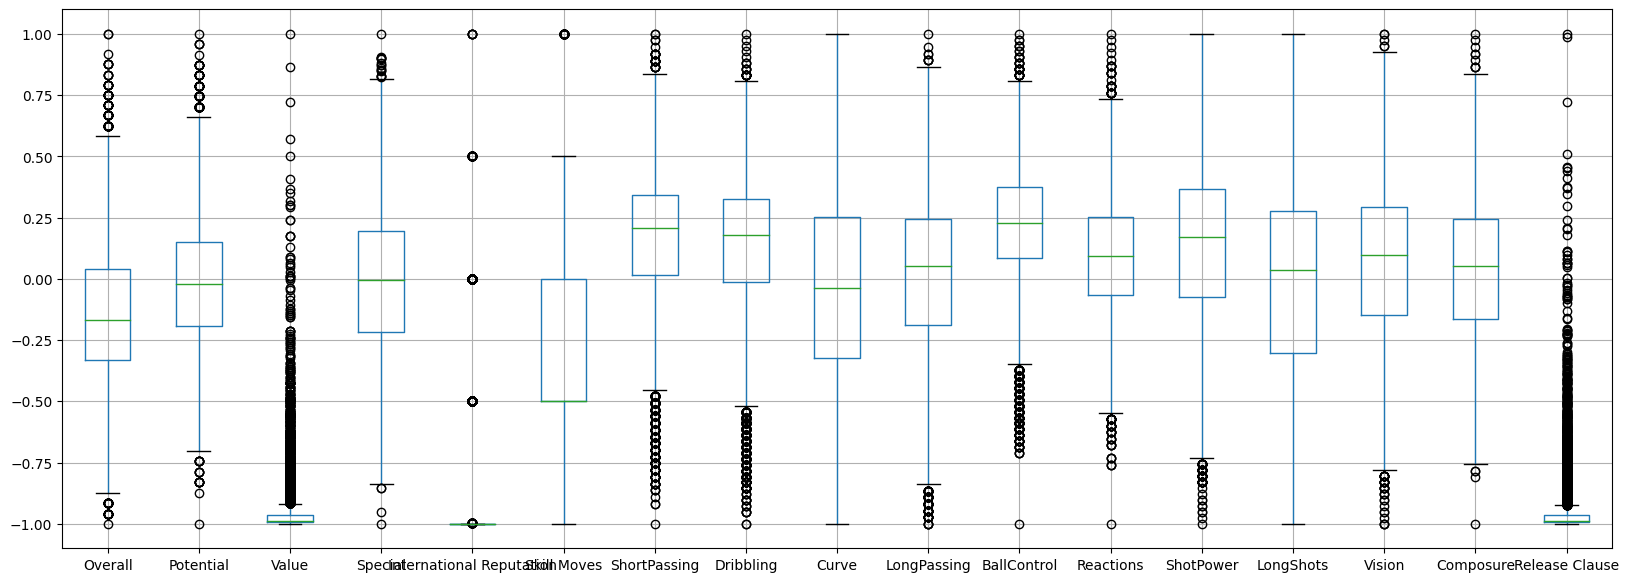

In [38]:
x.boxplot(figsize=(20,7))

In [39]:
x.boxplot(column=["Value"])

<AxesSubplot: >

In [40]:
x.describe()

,Overall,Potential,Value,Special,International Reputation,Skill Moves,ShortPassing,Dribbling,Curve,LongPassing,BallControl,Reactions,ShotPower,LongShots,Vision,Composure,Release Clause
count,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000
mean,-0.148194,-0.000168,-0.957256,-0.009157,-0.942463,-0.234316,0.167539,0.122164,-0.030659,0.001965,0.209113,0.098284,0.135984,-0.026091,0.059612,0.035883,-0.957106
std,0.282941,0.258724,0.096130,0.291906,0.197933,0.308559,0.268197,0.301224,0.364575,0.334671,0.241292,0.233583,0.322495,0.378560,0.314614,0.274044,0.097008
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.333333,-0.191489,-0.993671,-0.218425,-1.000000,-0.500000,0.013699,-0.012048,-0.325301,-0.189189,0.084337,-0.066667,-0.073171,-0.301205,-0.146341,-0.162162,-0.993257
50%,-0.166667,-0.021277,-0.987342,-0.005944,-1.000000,-0.500000,0.205479,0.180723,-0.036145,0.054054,0.228916,0.093333,0.170732,0.036145,0.097561,0.054054,-0.987072
75%,0.041667,0.148936,-0.962869,0.196137,-1.000000,0.000000,0.342466,0.325301,0.253012,0.243243,0.373494,0.253333,0.365854,0.277108,0.292683,0.243243,-0.965169
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Los atributos *Value* y *Release Clause* tienen muchos valores at\'ipicos', quizas tengamos que eliminarlos en un futuro.

In [ ]:
x.to_csv (ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)